In [1]:
import numpy as np
import math
import skimage
from matplotlib import pyplot as plt
from scipy.ndimage import convolve
from scipy.ndimage.filters import convolve,gaussian_filter
import cv2

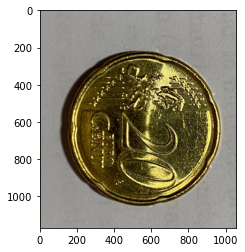

In [131]:
img = skimage.io.imread('20.jpeg')

plt.imshow(img, cmap='gray')
plt.show()

In [132]:
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]
array=red*1.0
array = gaussian_filter(array,1)
sobelX = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobelY = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
derivX = convolve(array,sobelX)
derivY = convolve(array,sobelY)
gradient = derivX+derivY*1j
G = np.absolute(gradient)
theta = np.angle(gradient)

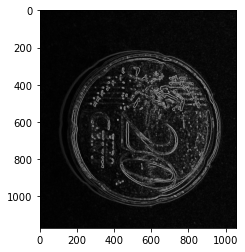

In [133]:
plt.imshow(G, cmap='gray')
plt.show()

In [134]:
seuil = 50
s = G.shape
np.where(G < seuil, 0, 255)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [135]:
s = G.shape
Gmax_2 = G.copy()
pi = math.pi
a = np.zeros(4)
a[0] = pi/8
for k in range(1,4):
    a[k] = a[k-1]+pi/4
for j in range(1,s[0]-1):
    for i in range(1,s[1]-1):
        if G[j][i]!=0:
            b = theta[j][i]
            if b>0:
                if (b<a[0]) or (b>a[3]):
                    g1 = G[j][i+1]
                    g2 = G[j][i+1]
                elif (b<a[1]):
                    g1 = G[j+1][i+1]
                    g2 = G[j-1][i-1]
                elif (b<a[2]):
                    g1 = G[j+1][i]
                    g2 = G[j-1][i]
                else:
                    g1 = G[j+1][i-1]
                    g2 = G[j-1][i+1]
            elif b<0:
                if (b<-a[3]):
                    g1 = G[j][i+1]
                    g2 = G[j][i-1]
                elif (b<-a[2]):
                    g1 = G[j-1][i-1]
                    g2 = G[j+1][i+1]
                elif (b<-a[1]):
                    g1 = G[j-1][i]
                    g2 = G[j+1][i]
                elif (b<-a[0]):
                    g1 = G[j-1][i+1]
                    g2 = G[j+1][i-1]
                else:
                    g1 = G[j][i+1]
                    g2 = G[j][i-1]
            if (G[j][i]<g1) or (G[j][i]<g2):
                Gmax_2[j][i] = 0.0
                


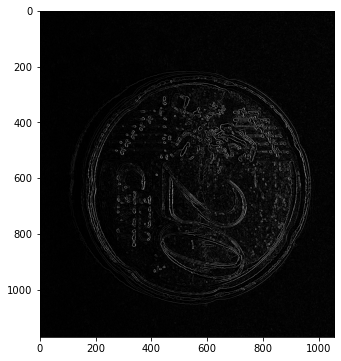

In [136]:
plt.figure(figsize=(6,6))
plt.imshow(Gmax_2,cmap='gray')

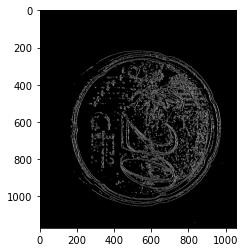

In [137]:
seuil = 150
plt.figure(figsize=(4,4))
plt.imshow(np.where(Gmax_2 > seuil, 255, 0),cmap='gray')

In [10]:
import numpy as np
import math
import skimage
from matplotlib import pyplot as plt
from scipy.ndimage import convolve
from scipy.ndimage.filters import convolve,gaussian_filter
import cv2

nb = 0

from os import listdir
from os.path import isfile, join
images = [f for f in listdir('images_to_treat') if isfile(join('images_to_treat', f))]


for f in images:
    img = cv2.imread('images_to_treat/' + f, 0)
    equ = cv2.equalizeHist(img)
    equ = cv2.GaussianBlur(equ,(5,5),0)
    retVal, th = cv2.threshold(equ, 10, 255, cv2.THRESH_BINARY)

    cv2.imwrite('borders/' + str(nb) + '.png', th)
    print('borders/' + str(nb) + '.png')
    nb += 1
    
    Gmax_2 = cv2.imread('borders/' + str(nb) + '.png', 0)
    


borders/0.png
borders/1.png
borders/2.png
borders/3.png
borders/4.png
borders/5.png
borders/6.png
borders/7.png
borders/8.png
borders/9.png
borders/10.png
borders/11.png
borders/12.png
borders/13.png
borders/14.png
borders/15.png
borders/16.png
borders/17.png
borders/18.png
borders/19.png
borders/20.png
borders/21.png
borders/22.png
borders/23.png
borders/24.png


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'cv::GaussianBlur'


In [1]:
import numpy as np
import math
import skimage
from matplotlib import pyplot as plt
from scipy.ndimage import convolve
from scipy.ndimage.filters import convolve,gaussian_filter
import cv2

In [2]:
from os import listdir
from os.path import isfile, join
images = [f for f in listdir('images_to_treat') if isfile(join('images_to_treat', f))]
nb = 0
for f in images:
    img = cv2.imread('images_to_treat/' + f, 0)
    img_c = cv2.imread('images_to_treat/' + f)
    Gmax_2 = cv2.imread('borders/' + str(nb) + '.png', 0)
    circles = circles = cv2.HoughCircles(Gmax_2, cv2.HOUGH_GRADIENT, 1.2, 500)
    output = img.copy()
    print(nb)
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(img_c, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(img_c, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

        cv2.imwrite('output/' + f, img_c)
    nb += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\hough.cpp:2257: error: (-215:Assertion failed) !_image.empty() && _image.type() == CV_8UC1 && (_image.isMat() || _image.isUMat()) in function 'cv::HoughCircles'


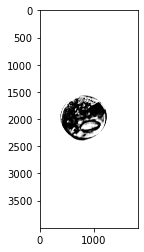

In [47]:
img = cv2.imread('images_to_treat/' + images[2], 0)
retVal, th = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY)
plt.imshow(th, cmap='gray')
plt.show()